Import Important Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

Understand the Dataset

In [134]:
data = pd.read_csv("heart.csv")

In [135]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape of dataset

In [136]:
data.shape

(303, 14)

Summary of dataset

In [137]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


An overview of the dataset 

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Understand features

In [139]:
dataset_features = [
    "age","1: male, 0: female","chest pain type, 1: typical angina, 2: \
    atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure",\
    " serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",\
    " maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",\
    "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",\
    "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(dataset_features)):
    print(data.columns[i] +":\t\t"+dataset_features[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2:     atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analyze target variable

In [140]:
data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [141]:
data["target"].unique()

array([1, 0])

The target variable having(1, 0) values, its a classification problem

Check corelation between features

In [142]:
check_cor = data.corr()["target"].abs().sort_values(ascending=False)

In [143]:
print(check_cor)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most features are relatively correlated with target, but 'fbs' is very weakly correlated.

Exploratory Data Analysis

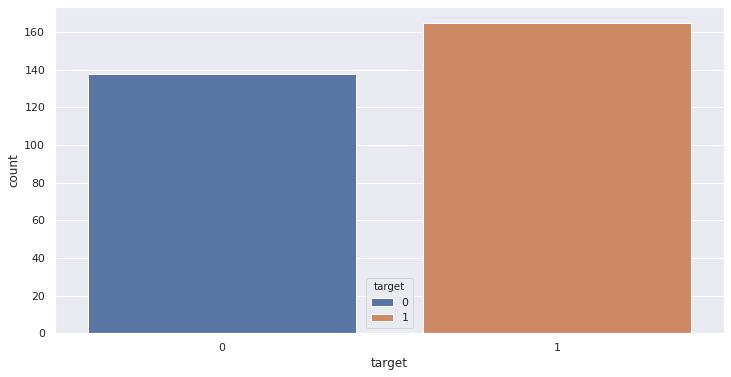

In [144]:
# Analyze target variable
sns.countplot(data["target"], hue=data["target"], dodge=False)

In [145]:
target_count = data.target.value_counts()
print(target_count)

1    165
0    138
Name: target, dtype: int64


From the total dataset of 303 patients, 165 (54.46%) have a heart disease (target=1) and 138 (45.54%) does not have heart disease(target=0)

In [146]:
# Analyze sex variable
data["sex"].unique()

array([1, 0])

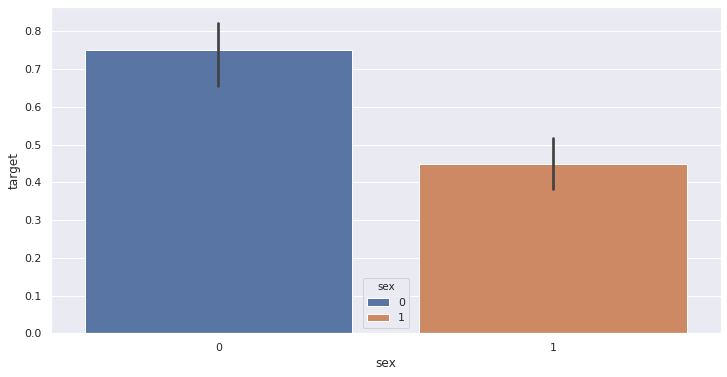

In [147]:
sns.barplot(data["sex"], data["target"], hue=data["sex"], dodge=False)

We notice, that females are more likely to have heart problems than males

In [148]:
# Analysing the 'Chest Pain Type' feature
data["cp"].unique()

array([3, 2, 1, 0])

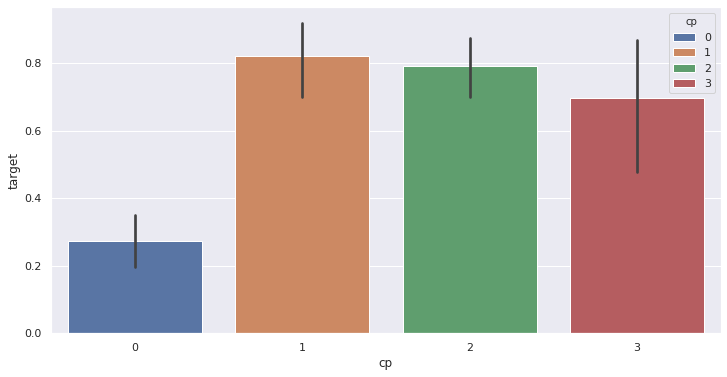

In [149]:
sns.barplot(data["cp"], data["target"], hue=data["cp"], dodge=False)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

In [150]:
# Analysing the FBS feature
data["fbs"].unique()

array([1, 0])

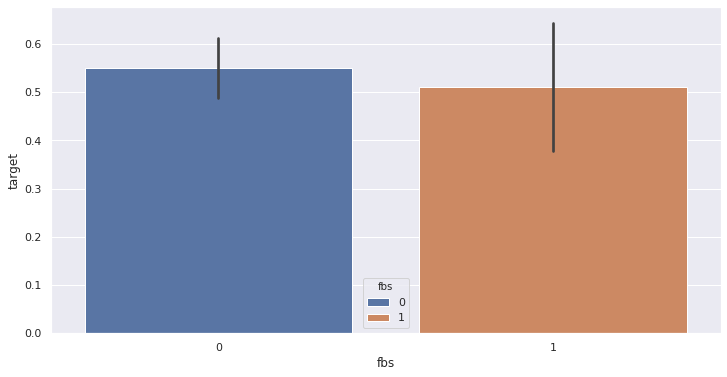

In [151]:
sns.barplot(data["fbs"], data["target"], hue=data["fbs"], dodge=False)

In [152]:
# Analysing the restecg feature
data["restecg"].unique()

array([0, 1, 2])

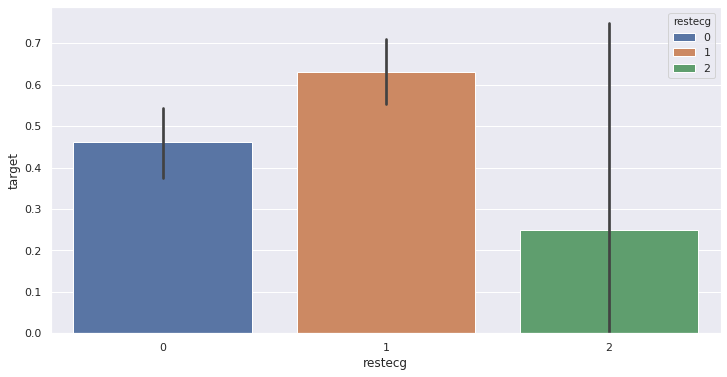

In [153]:
sns.barplot(data["restecg"], data["target"], hue=data["restecg"], dodge=False)

We notice that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

In [154]:
# Analysing the 'exang' feature
data["exang"].unique()

array([0, 1])

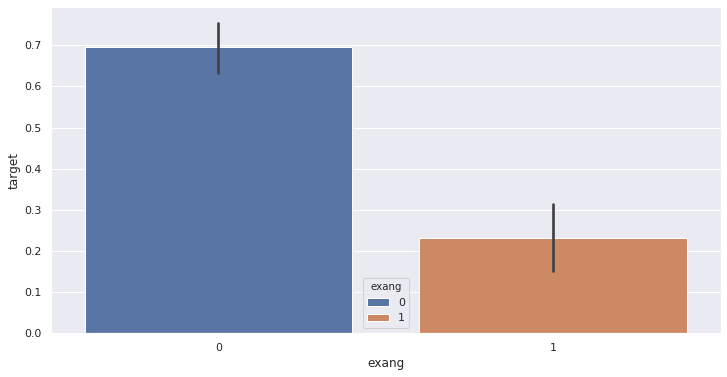

In [155]:
sns.barplot(data["exang"], data["target"], hue=data["exang"], dodge=False)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

In [156]:
# Analysing the Slope feature
data["slope"].unique()

array([0, 2, 1])

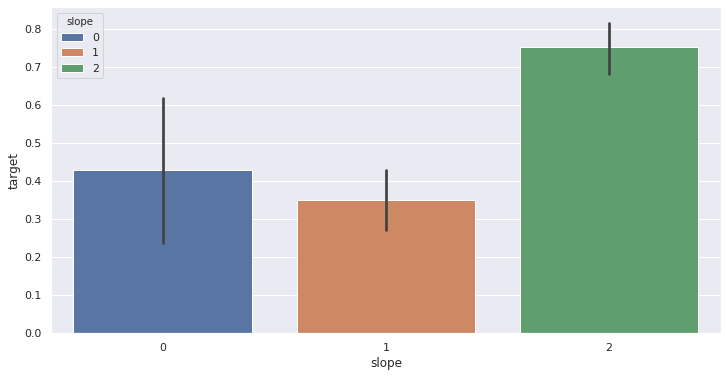

In [157]:
sns.barplot(data["slope"], data["target"], hue=data["slope"], dodge=False)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

In [158]:
# Analysing the 'ca' feature
data["ca"].unique()

array([0, 2, 1, 3, 4])

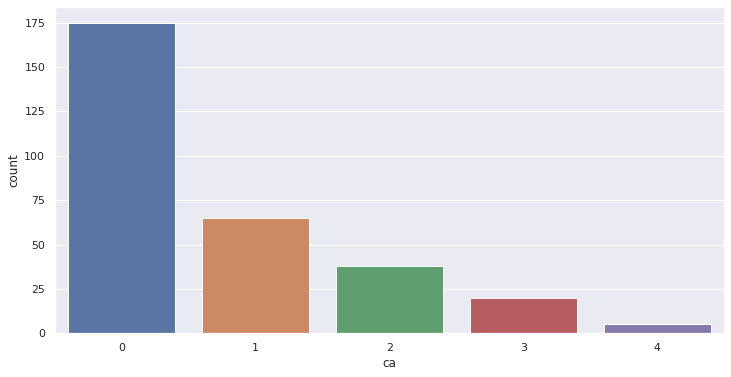

In [159]:
sns.countplot(data["ca"])

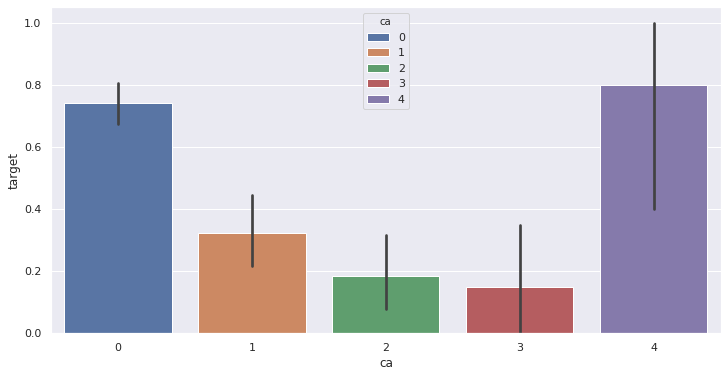

In [160]:
sns.barplot(data["ca"], data["target"], hue=data["ca"], dodge=False)

ca=4 has large number of heart patients

In [161]:
# Analysing the 'thal' feature
data["thal"].unique()

array([1, 2, 3, 0])

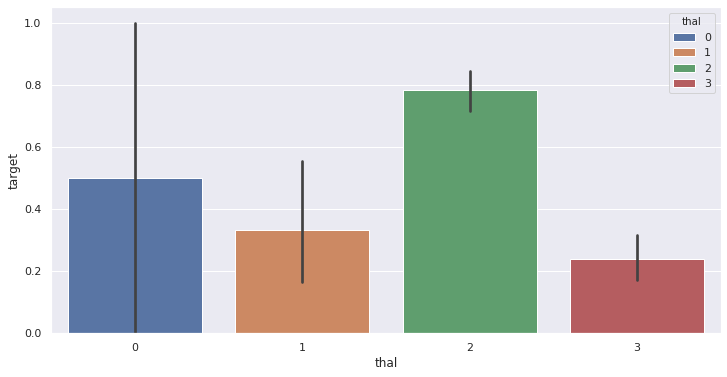

In [162]:
sns.barplot(data["thal"], data["target"], hue=data["thal"], dodge=False)

Split Data(Train and Test)

In [163]:
X = data.drop("target",axis=1)
Y = data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)

In [164]:
X_train.shape

(242, 13)

In [165]:
X_test.shape

(61, 13)

In [166]:
Y_train.shape

(242,)

In [167]:
Y_test.shape

(61,)

Logistic Regression

In [168]:
logistic_regression = LogisticRegression()

In [169]:
logistic_regression.fit(X_train,Y_train)

/home/zia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
Y_pred_logistic_reg = logistic_regression.predict(X_test)

In [171]:
Y_pred_logistic_reg.shape

(61,)

In [172]:
logistic_reg_score = round(accuracy_score(Y_pred_logistic_reg,Y_test)*100, 2)
print("The accuracy score achieved using Logistic Regression is: "+str(logistic_reg_score)+"%")

The accuracy score achieved using Logistic Regression is: 85.25%


Support Vector Machine

In [173]:
svm_model = svm.SVC(kernel='linear')

In [174]:
svm_model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [175]:
Y_pred_svm = svm_model.predict(X_test)

In [176]:
Y_pred_svm.shape

(61,)

In [177]:
svm_score = round(accuracy_score(Y_pred_svm,Y_test)*100, 2)
print("The accuracy score achieved using Linear SVM is: "+str(svm_score)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


Comparison between Logistic Regression and Support vector Machine

In [178]:
scores = [logistic_reg_score, svm_score]
models = ["Logistic Regression", "Support Vector Machine"]    

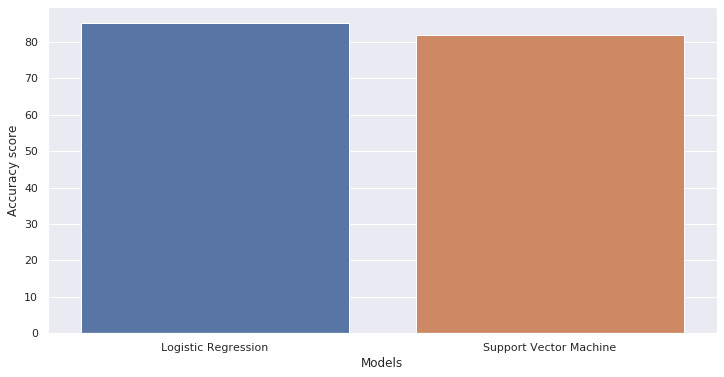

In [189]:
plt.xlabel("Models")
plt.ylabel("Accuracy score")
sns.barplot(models,scores)

Above barplot shows Logistic regression has better accuracy than Support vector machine